# Repetition Deskriptive Zeitreihenanalyse - Temperaturkurven in Kremsmünster

In dieser Aufgabe beschäftigen wir uns mit dem Temperaturdatensatz, 
der in Kremsmünster erhoben wurde. Die ursprüngliche Messstation 
an der Nordostseite des astronomischen Turmes der 
Benediktinerabtei Kremsmünster in Oberösterreich gilt als 
vertrauenswürdig und unverändert seit dem Beginn der 
Messungen im März 1767 bis jetzt. 

Sie können die Datei  `Krems.tx` als multivariate Zeitreihe mit den monatlichen Tiefsttemperaturen `temp_min`, den monatlichen Höchsttemperaturen `temp_max`, den monatlich gemittelten Temperaturen `temp_mean`, der Anzahl Tage unter 0 Grad Celsius pro Monat `num_cold_day` und der Anzahl Tage über 30 Grad Celsius pro Monat `num_hot_days` einlesen.  

Benützen Sie die folgende `Python`-Ausgabe, um die untenstehenden Fragen 
zu beantworten:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
krems = pd.read_csv('./krems.txt', sep=' ', header=0)
krems.set_index(pd.to_datetime(krems["date"]), inplace=True)
print(krems.head())

            Y.temp_min  Y.temp_max  Y.temp_mean  Y.num_cold_days  \
date                                                               
1876-01-01       -17.8         4.0    -5.537097             28.0   
1876-02-01       -17.5        14.0    -0.970690             15.0   
1876-03-01        -6.4        16.7     4.027419              4.0   
1876-04-01        -1.0        23.6    10.180000              0.0   
1876-05-01        -0.5        22.2     8.993548              0.0   

            Y.num_hot_days        date  
date                                    
1876-01-01               0  1876-01-01  
1876-02-01               0  1876-02-01  
1876-03-01               0  1876-03-01  
1876-04-01               0  1876-04-01  
1876-05-01               0  1876-05-01  


(a) Wie gross sind die Zeitschritte in der Zeitreihe `krems.txt`?

__Lösung__

In [11]:
print(krems.index)

DatetimeIndex(['1876-01-01', '1876-02-01', '1876-03-01', '1876-04-01',
               '1876-05-01', '1876-06-01', '1876-07-01', '1876-08-01',
               '1876-09-01', '1876-10-01',
               ...
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01'],
              dtype='datetime64[ns]', name='date', length=1721, freq=None)


Es handelt sich um monatliche Daten.

(b) In welchem Monat beginnt die Zeitreihe und wann endet sie?

In [12]:
print(krems.head(3))
print(krems.tail(3))

            Y.temp_min  Y.temp_max  Y.temp_mean  Y.num_cold_days  \
date                                                               
1876-01-01       -17.8         4.0    -5.537097             28.0   
1876-02-01       -17.5        14.0    -0.970690             15.0   
1876-03-01        -6.4        16.7     4.027419              4.0   

            Y.num_hot_days        date  
date                                    
1876-01-01               0  1876-01-01  
1876-02-01               0  1876-02-01  
1876-03-01               0  1876-03-01  
            Y.temp_min  Y.temp_max  Y.temp_mean  Y.num_cold_days  \
date                                                               
2019-03-01        -2.1        19.9     8.296774              0.0   
2019-04-01         1.7        27.9    11.638333              0.0   
2019-05-01         1.1        23.6    12.385484              0.0   

            Y.num_hot_days        date  
date                                    
2019-03-01               0  201

__Lösung__ : Die Zeitreihe beginngt im Januar 1876 und endet im Mai 209. 

(c) Generieren Sie 12 Boxplots für die Zeitperiode von 1876 bis 
1999 und 12 Boxplots für die Zeitperiode zwischen 2000 und 2019. Jeder Boxplot 
soll die monatlichen Tiefsttemperaturen in diesen Zeitperioden aufzeichnen. 


Beschreiben Sie in zwei Sätzen, was Sie beobachten.

            Y.temp_min  Y.temp_max  Y.temp_mean  Y.num_cold_days  \
date                                                               
1876-01-01       -17.8         4.0    -5.537097             28.0   
1876-02-01       -17.5        14.0    -0.970690             15.0   
1876-03-01        -6.4        16.7     4.027419              4.0   
1876-04-01        -1.0        23.6    10.180000              0.0   
1876-05-01        -0.5        22.2     8.993548              0.0   

            Y.num_hot_days        date  Year  Month  
date                                                 
1876-01-01               0  1876-01-01  1876      1  
1876-02-01               0  1876-02-01  1876      2  
1876-03-01               0  1876-03-01  1876      3  
1876-04-01               0  1876-04-01  1876      4  
1876-05-01               0  1876-05-01  1876      5  


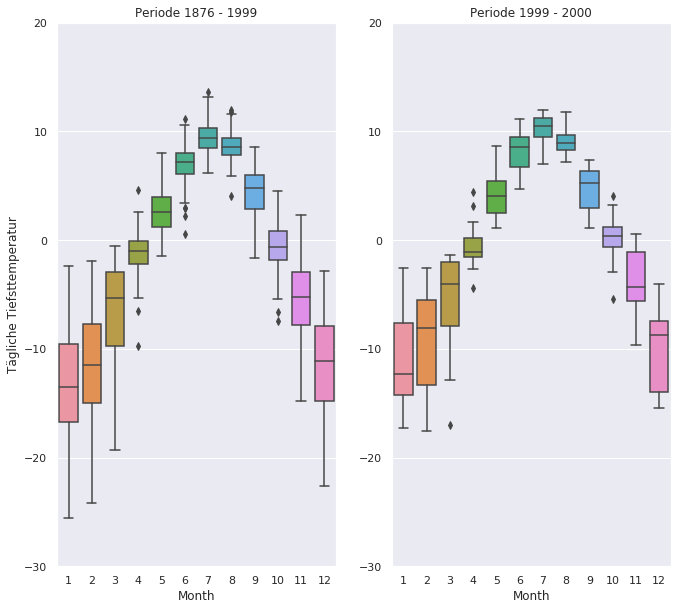

In [8]:
krems['Year'] = krems.index.year
krems['Month'] = krems.index.month
print(krems.head())
krems_1876_1999 = krems.loc['1876':'1999']
krems_2000_2019 = krems.loc['2000':'2019']
period = ['Periode 1876 - 1999', 'Periode 1999 - 2000']
fig, axes = plt.subplots(1, 2, figsize=(11, 10), sharex=True)
i=0
for i, (name, ax) in enumerate(zip([krems_1876_1999, krems_2000_2019], axes)):
    sns.boxplot(data=name, x='Month', y='Y.temp_min', ax=ax)
    ax.set_ylim(-30,20)
    ax.set_ylabel('Tägliche Tiefsttemperatur')
    ax.set_title('{}'.format(period[i]))
    if ax != axes[0]:
        ax.set_ylabel('')

__Lösung__ : Die saisonale Struktur ist wie erwartet ersichtlich, allerdings stellen wir 
fest, dass die Winter in den letzten Jahren weniger kalt wurden. Während winterliche 
Tiefsttemperaturen im Bereich von -25 Grad Celsius bis -15 Grad Celsius
zu früheren Zeiten vorkamen, reichen die winterlichen Tiefsttemperaturen 
der letzten Jahren höchstens bis zu -15 Grad Celsius. 


(d) Generieren Sie 12 Boxplots für die Zeitperiode von 1876 bis 
1999 und 12 Boxplots für die Zeitperiode zwischen 2000 und 2019. Jeder Boxplot 
soll die monatlichen Höchsttemperaturen in diesen Zeitperioden aufzeichnen. 

Beschreiben Sie in zwei Sätzen, was Sie beobachten.

            Y.temp_min  Y.temp_max  Y.temp_mean  Y.num_cold_days  \
date                                                               
1876-01-01       -17.8         4.0    -5.537097             28.0   
1876-02-01       -17.5        14.0    -0.970690             15.0   
1876-03-01        -6.4        16.7     4.027419              4.0   
1876-04-01        -1.0        23.6    10.180000              0.0   
1876-05-01        -0.5        22.2     8.993548              0.0   

            Y.num_hot_days        date  Year  Month  
date                                                 
1876-01-01               0  1876-01-01  1876      1  
1876-02-01               0  1876-02-01  1876      2  
1876-03-01               0  1876-03-01  1876      3  
1876-04-01               0  1876-04-01  1876      4  
1876-05-01               0  1876-05-01  1876      5  


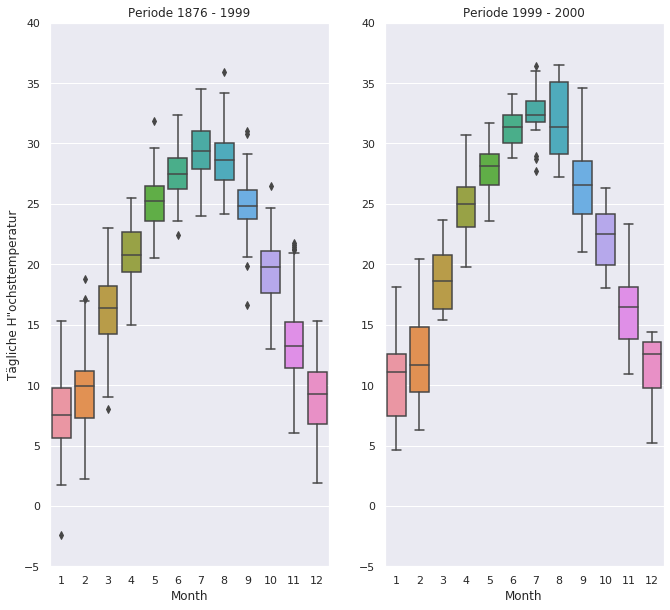

In [7]:
krems['Year'] = krems.index.year
krems['Month'] = krems.index.month
print(krems.head())
krems_1876_1999 = krems.loc['1876':'1999']
krems_2000_2019 = krems.loc['2000':'2019']
period = ['Periode 1876 - 1999', 'Periode 1999 - 2000']
fig, axes = plt.subplots(1, 2, figsize=(11, 10), sharex=True)
i=0
for i, (name, ax) in enumerate(zip([krems_1876_1999, krems_2000_2019], axes)):
    sns.boxplot(data=name, x='Month', y='Y.temp_max', ax=ax)
    ax.set_ylim(-5,40)
    ax.set_ylabel('Tägliche H\"ochsttemperatur')
    ax.set_title('{}'.format(period[i]))
    if ax != axes[0]:
        ax.set_ylabel('')

__Lösung__ : Die saisonale Struktur ist wie erwartet ersichtlich, allerdings stellen wir 
fest, dass die Sommer in den vergangenen Jahren wärmer 
wurden. Zudem haben sich Tageshöchsttemperaturen nach oben verschoben und Temperaturen 
im Bereich von 30 Grad Celsius bis 35 Grad Celsius sind häufiger zu beobachten.

(e) In dieser Aufgabe beschäftigen wir uns mit der Anzahl Tage pro Jahr, 
bei denen das Thermometer unter 0 Grad Celsius fällt und mit der Anzahl heisser Tage 
pro Jahr, bei denen Temperaturen von (> 30 Grad Celsius) herrschen. 

Wir zählen die Anzahl Tage im Jahr, bei denen das Thermometer unter $ 0 $ Grad Celsius fällt.

count    144.000000
mean      55.270833
std       18.675821
min        0.000000
25%       44.000000
50%       54.000000
75%       68.250000
max      101.000000
Name: Y.num_cold_days, dtype: float64


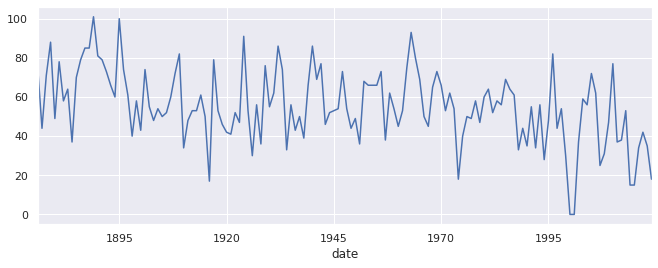

In [9]:
freezing_days = krems['Y.num_cold_days'].resample('A').sum()
print(freezing_days.describe())
freezing_days.plot()

Beschreiben Sie Ihre Beobachtungen in Bezug auf die Anzahl von Unternulltagen pro Jahr in einem Satz.


__Lösung__ : Während Kremsmünster in frühren Jahren um die 60 bis 80 Unternulltage pro 
Jahr erlebte, zeigt die Graphik, dass diese Anzahl Tage nun bei rund 40 Tagen liegt.

(f) Wir zählen die Anzahl Tage pro Jahr, bei denen Temperaturen von (> 30 Grad Celsius) herrschen. 

count    144.000000
mean       3.340278
std        5.798677
min        0.000000
25%        0.000000
50%        1.000000
75%        5.000000
max       38.000000
Name: Y.num_hot_days, dtype: float64


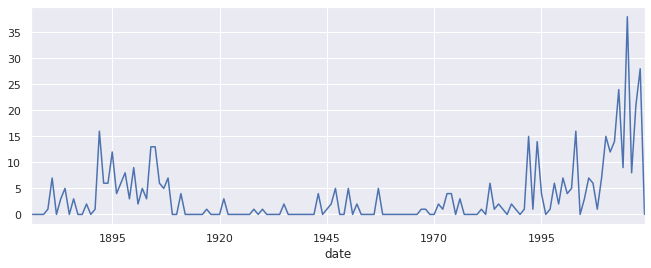

In [10]:
hot_days = krems['Y.num_hot_days'].resample('A').sum()
print(hot_days.describe())
hot_days.plot()

Beschreiben Sie in einem Satz Ihre Beobachtungen in Bezug auf die Anzahl Tage, bei denen 
das Thermometer über 30 Grad Celsius klettert. 

__Lösung__ : Die Anzahl Tage, bei denen das Thermometer über 30 Grad Celsius klettert, lag
Anfang des letzten Jahrhunderts zwischen 0 und 5 Tagen pro Jahr und hat mittlerweilen 15 bis 20 Tage pro Jahr erreicht. 

(g) Wir berechnen die Temperatur-Anomalie, d.h. wir subtrahieren von den 
Jahresmittelwerten den _Jahrhundertmittelwert_, der über die Zeitdauer von 1876 bis 
1976 berechnet wurde.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


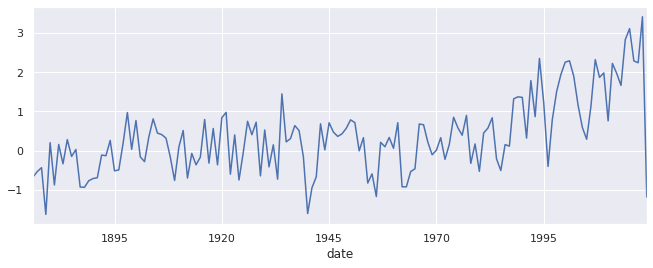

In [11]:
century_mean = krems.loc['1876':'1976', 'Y.temp_mean'].mean()
century_mean
anomaly =  krems['Y.temp_mean'].resample('A', how=lambda x: x.values.mean()) - century_mean
anomaly_imp = anomaly.interpolate(method='polynomial', order=2)
anomaly_imp.plot()

Beschreiben Sie in zwei Sätzen Ihre Beobachtungen.

__Lösung__ : Die jährliche Temperaturanomalie nähert sich langsam 3 Grad Celsius an.

(f) Zerlegen Sie die monatlichen Höchsttemperaturen 
über den Zeitraum von 1950 bis 2019 in eine Trendkomponente, in eine 
saisonale Komponente und in einen Restterm.

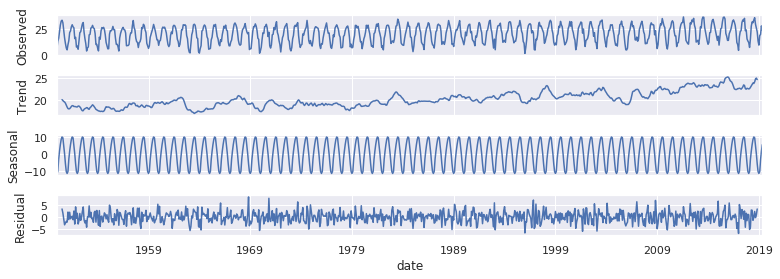

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(krems.loc['1950':'2019', 'Y.temp_max'], 
                   model = "additive", freq = 12).plot();